In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load Data

In [4]:
#dataset = np.load('/kaggle/input/continuous-stirred-tank-reactor-domain-adaptation/cstr_rawdata.npy')
#df = pd.DataFrame(dataset).rename(columns = {1400:'class_label', 1401:'domain_label', 1402:'parameter_noise', 1403:'reaction_order'})
df = pd.read_csv("/content/cstr_data.csv")

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,1394,1395,1396,1397,1398,1399,class_label,domain_label,parameter_noise,reaction_order
0,0.999719,0.999854,1.000517,0.999764,0.999982,1.000978,1.000314,0.999953,0.999051,1.000165,...,10.097724,10.042699,9.963228,10.084302,10.548740,10.032248,0.0,0.0,0.0,1.0
1,1.002411,1.000820,1.001000,0.999042,0.999200,1.001231,1.001470,1.001782,0.999543,0.999201,...,9.731097,10.080027,9.896257,9.088898,9.798987,10.418807,0.0,0.0,0.0,1.0
2,0.999197,0.998922,1.000095,0.999389,0.999128,0.999978,0.999889,1.001926,1.000072,0.999326,...,10.041097,9.745254,10.877219,9.592610,10.046595,10.262627,0.0,0.0,0.0,1.0
3,1.000770,1.000499,0.999830,1.000854,1.001071,1.001708,0.999969,0.998799,1.000446,0.999382,...,10.570380,9.610376,10.546058,10.679968,10.282365,10.035451,0.0,0.0,0.0,1.0
4,1.001674,1.000058,0.999202,0.998686,0.999539,0.999194,1.000795,1.000007,0.999421,1.000157,...,9.787158,9.954904,10.416254,9.866833,10.053383,10.025643,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0.999964,1.001357,1.000251,1.002037,0.998911,1.000019,1.000617,1.000612,1.001481,0.999534,...,148.736242,152.867558,138.795945,155.277948,155.100270,140.669826,4.0,0.0,0.0,1.0
478,0.997857,1.000363,0.999831,0.999420,0.999296,1.000124,0.999513,0.999951,1.000458,0.999766,...,151.336607,155.687944,141.355270,148.939082,143.437205,156.902160,4.0,0.0,0.0,1.0
479,0.998252,1.000654,0.998278,1.000781,0.998258,1.000398,1.000466,1.000679,0.998772,1.000815,...,150.205401,151.736768,154.414727,150.933426,155.917360,150.479707,4.0,0.0,0.0,1.0
480,0.999516,1.000774,0.998361,1.001239,1.001261,0.999941,0.999338,0.998933,0.999197,0.998665,...,141.100363,156.565408,148.219072,149.306015,150.509290,142.022129,4.0,0.0,0.0,1.0


In [7]:
df['domain_label'].value_counts()

domain_label
0.0    481
Name: count, dtype: int64

# State Prediction

In [8]:
data = []
for idx in df[df['domain_label'] == 0].index:
    row = np.array(df.iloc[idx, :-4])
    data.append(row.reshape(200,7))

data = np.array(data)
print(data.shape)

(481, 200, 7)


In [9]:
train, test = train_test_split(data, test_size=0.2, random_state=53)

lis = []
for i in range(train.shape[0]):
    for j in range(10):
        lis.append(train[i][j*20:(j+1)*20,:])

X_train = np.array(lis)[:,:-1, :].reshape(-1, 19*7)
y_train = np.array(lis)[:,-1, :]

lis = []
for i in range(test.shape[0]):
    for j in range(10):
        lis.append(test[i][j*20:(j+1)*20,:])

X_test = np.array(lis)[:,:-1, :].reshape(-1, 19*7)
y_test = np.array(lis)[:,-1, :]

In [10]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 51.8173936784821


In [11]:
def mean_absolute_deviation_percentage(y_true, y_pred):
    abs_diff = np.abs(y_true - y_pred)
    abs_deviation = np.mean(abs_diff, axis=0)
    true_mean = np.mean(y_true, axis=0)
    mad_percentage = np.mean(abs_deviation / true_mean) * 100
    return mad_percentage

mad_percentage = mean_absolute_deviation_percentage(y_test, y_pred)
print("Avg of Mean Absolute Deviation Percentage (MAD %) across all variables:", mad_percentage)

Avg of Mean Absolute Deviation Percentage (MAD %) across all variables: 1.274620944556824


In [12]:
abs_deviation = np.mean(np.abs(y_test - y_pred), axis=0)
true_mean = np.mean(y_test, axis=0)
variable_wise_error = (abs_deviation / true_mean) * 100

for i in range(7):
    print(f"Error (MAD %) in state variable {i+1} is {variable_wise_error[i]}%")

Error (MAD %) in state variable 1 is 1.1750050450247085%
Error (MAD %) in state variable 2 is 1.156839314950158%
Error (MAD %) in state variable 3 is 1.1830772441705812%
Error (MAD %) in state variable 4 is 1.5703241744943783%
Error (MAD %) in state variable 5 is 1.447670416703445%
Error (MAD %) in state variable 6 is 1.1750786934905348%
Error (MAD %) in state variable 7 is 1.2143517230639622%


### Prediciting more than one time step ahead

Predict t+1 and use it as part of input of model again to get t+2 and so on

In [13]:
error ={
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[],
    10:[],
}
for i in range(test.shape[0]):
    sequence = test[i]
    for j in range(0, 200, 30):
        if j == 180: continue
        true_sample = sequence[j:j+30,:]
        model_input_sample = true_sample[:19, :]

        for t in range(1, 11):
            pred = mlp.predict(model_input_sample.reshape(-1,19*7))
            error[t].append(np.abs(pred - true_sample[19+t]))
            model_input_sample = (list(model_input_sample))
            model_input_sample.append(pred.reshape(-1))
            model_input_sample = np.array(model_input_sample)[-19:, :]

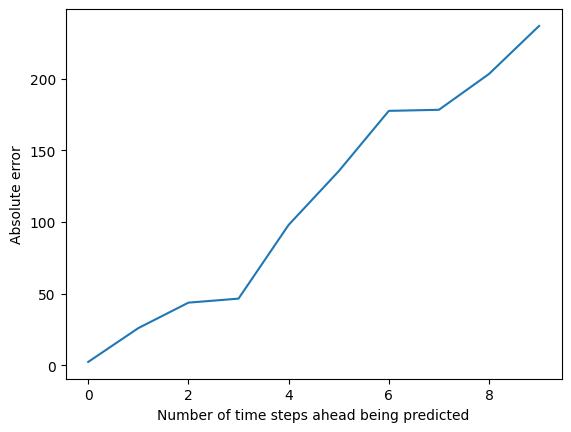

In [14]:
plt.plot([np.mean(error[t]) for t in range(1,11)])
plt.xlabel("Number of time steps ahead being predicted")
plt.ylabel("Absolute error")
plt.show()

Error increases as we try to predicted further ahead

# Fault Classification

## Same domain - Training on domain 0, testing on domain 0

In [ ]:
X = df[df['domain_label'] == 0].iloc[:, :-4]
y = df[df['domain_label'] == 0].iloc[:, -4]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=53)
print("X_train shape ", X_train.shape, "| y_train shape ", y_train.shape)
print("X_test shape ", X_test.shape, "| y_test shape ", y_test.shape)

X_train shape  (975, 1400) | y_train shape  (975,)
X_test shape  (325, 1400) | y_test shape  (325,)


In [ ]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, n_components):
    pca = PCA(n_components=n_components)

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", pca),
        ("model", model)
    ])

    print(f"Pipeline used : {pipeline}")

    pipeline.fit(X_train, y_train)

    accuracy = pipeline.score(X_test, y_test)
    print(f"\nAccuracy using {model} as prediction model:", accuracy)

    y_pred = pipeline.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nConfusion Matrix using {model} as prediction model:")
    print(conf_matrix)

    return pipeline, accuracy

In [ ]:
same_domain_results = {"model":[], "accuracy":[]}

### Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=10000)
pipeline, accuracy = train_and_evaluate(logreg, X_train, X_test, y_train, y_test, 64)

same_domain_results['model'].append('Logistic Regression')
same_domain_results['accuracy'].append(accuracy)

Pipeline used : Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=64)),
                ('model', LogisticRegression(max_iter=10000))])

Accuracy using LogisticRegression(max_iter=10000) as prediction model: 0.7784615384615384

Confusion Matrix using LogisticRegression(max_iter=10000) as prediction model:
[[24  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  5  4  4]
 [ 0  0  0  0  0  0  0  0  0  4  7  7  7]
 [ 0  0  0  0  0  0  0  0  0  9  6  4  6]
 [ 0  0  0  0  0  0  0  0  0  5  9  5  6]]


### KNN

In [ ]:
knn = KNeighborsClassifier()
pipeline, accuracy = train_and_evaluate(knn, X_train, X_test, y_train, y_test, 64)

same_domain_results['model'].append('K Nearest Neighbours')
same_domain_results['accuracy'].append(accuracy)

Pipeline used : Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=64)),
                ('model', KNeighborsClassifier())])

Accuracy using KNeighborsClassifier() as prediction model: 0.9661538461538461

Confusion Matrix using KNeighborsClassifier() as prediction model:
[[25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25]]


### SVM Classifier

In [ ]:
svm = SVC()
pipeline, accuracy = train_and_evaluate(svm, X_train, X_test, y_train, y_test, 64)

same_domain_results['model'].append('SVM')
same_domain_results['accuracy'].append(accuracy)

Pipeline used : Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=64)),
                ('model', SVC())])

Accuracy using SVC() as prediction model: 0.9292307692307692

Confusion Matrix using SVC() as prediction model:
[[25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2 16  1  0  6]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  7]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25]]


### Shallow Neural Network

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 16), max_iter=10000)
pipeline, accuracy = train_and_evaluate(mlp, X_train, X_test, y_train, y_test, 64)

same_domain_results['model'].append('2 Layer Neural Network')
same_domain_results['accuracy'].append(accuracy)

Pipeline used : Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=64)),
                ('model',
                 MLPClassifier(hidden_layer_sizes=(64, 16), max_iter=10000))])

Accuracy using MLPClassifier(hidden_layer_sizes=(64, 16), max_iter=10000) as prediction model: 0.9784615384615385

Confusion Matrix using MLPClassifier(hidden_layer_sizes=(64, 16), max_iter=10000) as prediction model:
[[25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0 24  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25]]


In [ ]:
print("Results using different models | Here PCA components used is fixed at 64")
pd.DataFrame(same_domain_results)

Results using different models | Here PCA components used is fixed at 64


,model,accuracy
0,Logistic Regression,0.778462
1,K Nearest Neighbours,0.966154
2,SVM,0.929231
3,2 Layer Neural Network,0.978462


### Varying PCA Components

In [ ]:
print("Model used is SVM(Support Vector Machine)")
for n_components in [2, 4, 8, 16, 64, 128, 512]:
    model = SVC()
    pca = PCA(n_components=n_components)
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", pca),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    accuracy = pipeline.score(X_test, y_test)

    print(f"Data is projected to - {n_components} dimensions using PCA, accuracy - {accuracy}")

Model used is SVM(Support Vector Machine)
Data is projected to - 2 dimensions using PCA, accuracy - 0.803076923076923
Data is projected to - 4 dimensions using PCA, accuracy - 0.8338461538461538
Data is projected to - 8 dimensions using PCA, accuracy - 0.8738461538461538
Data is projected to - 16 dimensions using PCA, accuracy - 0.9292307692307692
Data is projected to - 64 dimensions using PCA, accuracy - 0.9292307692307692
Data is projected to - 128 dimensions using PCA, accuracy - 0.9292307692307692
Data is projected to - 512 dimensions using PCA, accuracy - 0.9261538461538461


Observation - after some number of components, all the information needed is captured by PCA, so score doesnt increase

## Cross Domain Testing - Training on domain 0 & testing on domain 1

In [ ]:
X_train = df[df['domain_label'] == 0].iloc[:, :-4]
y_train = df[df['domain_label'] == 0].iloc[:, -4]

X_test = df[df['domain_label'] == 1].iloc[:, :-4]
y_test = df[df['domain_label'] == 1].iloc[:, -4]

print("X_train shape ", X_train.shape, "| y_train shape ", y_train.shape)
print("X_test shape ", X_test.shape, "| y_test shape ", y_test.shape)

X_train shape  (1300, 1400) | y_train shape  (1300,)
X_test shape  (260, 1400) | y_test shape  (260,)


### Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=10000)
train_and_evaluate(logreg, X_train, X_test, y_train, y_test, 64)

Pipeline used : Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=64)),
                ('model', LogisticRegression(max_iter=10000))])

Accuracy using LogisticRegression(max_iter=10000) as prediction model: 0.47307692307692306

Confusion Matrix using LogisticRegression(max_iter=10000) as prediction model:
[[17  0  0  0  0  0  0  0  2  1  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  1  0  0  6]
 [ 0  0 12  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  6  4  0  0  0]
 [ 0  0  0  0 15  0  0  0  3  2  0  0  0]
 [ 0  0  0  0  0 11  0  0  3  6  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  8  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  3  2  2  2]
 [ 0  0  0  0  0  0  0  0  7  8  1  0  4]
 [ 0  0  0  0  0  0  0  0  0 13  4  1  2]
 [ 0  0  0  0  0  0  0  0  8  7  2  0  3]
 [ 0  0  0  0  0  0  0  0  6 11  0  0  3]]


(Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=64)),
                 ('model', LogisticRegression(max_iter=10000))]),
 0.47307692307692306)

### KNN

In [ ]:
knn = KNeighborsClassifier()
train_and_evaluate(knn, X_train, X_test, y_train, y_test, 64)

Pipeline used : Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=64)),
                ('model', KNeighborsClassifier())])

Accuracy using KNeighborsClassifier() as prediction model: 0.7615384615384615

Confusion Matrix using KNeighborsClassifier() as prediction model:
[[14  0  0  0  0  0  0  0  2  4  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  3  0  0  6]
 [ 0  0  0  0  0  0  0  0  1 19  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  2 15  0  1]
 [ 0  0  0  0  0  0  0  0  3  5  0 11  1]
 [ 0  0  0  0  0  0  0  0  6 10  0  0  4]]


(Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=64)),
                 ('model', KNeighborsClassifier())]),
 0.7615384615384615)

### SVM Classifier

In [ ]:
svm = SVC()
train_and_evaluate(svm, X_train, X_test, y_train, y_test, 64)

Pipeline used : Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=64)),
                ('model', SVC())])

Accuracy using SVC() as prediction model: 0.7423076923076923

Confusion Matrix using SVC() as prediction model:
[[19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  5  0  0  0]
 [ 1  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0 16  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  3  0  0  6]
 [ 1  0  0  0  0  0  0  0  1 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  4 11  0  3]
 [ 1  0  0  0  0  0  0  0  3  9  0  6  1]
 [ 0  0  0  0  0  0  0  0  7  9  0  0  4]]


(Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=64)),
                 ('model', SVC())]),
 0.7423076923076923)

### Shallow Neural Network

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 16), max_iter=10000)
mlp_pipeline, accuracy = train_and_evaluate(mlp, X_train, X_test, y_train, y_test, 64)

Pipeline used : Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=64)),
                ('model',
                 MLPClassifier(hidden_layer_sizes=(64, 16), max_iter=10000))])

Accuracy using MLPClassifier(hidden_layer_sizes=(64, 16), max_iter=10000) as prediction model: 0.7615384615384615

Confusion Matrix using MLPClassifier(hidden_layer_sizes=(64, 16), max_iter=10000) as prediction model:
[[17  0  0  0  0  0  0  0  0  2  1  0  0]
 [ 0 16  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0 18  0  0  0  2  0  0  0]
 [ 0  5  0  0  0  0 14  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  2  4  0  3]
 [ 0  0  0  0  0  0  0  0  1 19  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2 17  1  0]
 [ 0  0  0  0  0  0  0  0  2  5  0 12  1]
 [ 0  0  0  0  0  0  0  0  2 13  0  1  4]]


Confusion matrix for 2 layer NN trained on domain 0, tested on domain 1:



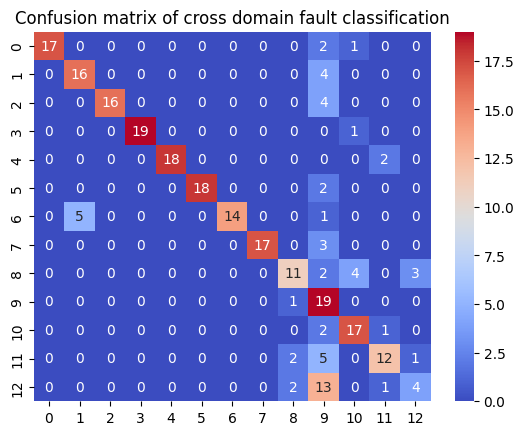

In [ ]:
print("Confusion matrix for 2 layer NN trained on domain 0, tested on domain 1:\n")
y_pred = mlp_pipeline.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.title('Confusion matrix of cross domain fault classification')
plt.show()

## Cross domain validation for all domains

In [ ]:
print("Using K Nearest Neighbours Model")
for domain in range(1, 7):
    X_train = df[df['domain_label'] == 0].iloc[:, :-4]
    y_train = df[df['domain_label'] == 0].iloc[:, -4]

    X_test = df[df['domain_label'] == domain].iloc[:, :-4]
    y_test = df[df['domain_label'] == domain].iloc[:, -4]

    model = KNeighborsClassifier()
    pca = PCA(n_components=n_components)

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", pca),
        ("model", model)
    ])

    pipeline.fit(X_train, y_train)
    accuracy = pipeline.score(X_test, y_test)

    print(f"Training on domain 0({len(X_train)} samples), testing on domain {domain} ({len(X_test)} samples) | Accuracy - {accuracy}")

Using K Nearest Neighbours Model
Training on domain 0(1300 samples), testing on domain 1 (260 samples) | Accuracy - 0.7653846153846153
Training on domain 0(1300 samples), testing on domain 2 (260 samples) | Accuracy - 0.6
Training on domain 0(1300 samples), testing on domain 3 (260 samples) | Accuracy - 0.5538461538461539
Training on domain 0(1300 samples), testing on domain 4 (260 samples) | Accuracy - 0.5192307692307693
Training on domain 0(1300 samples), testing on domain 5 (260 samples) | Accuracy - 0.47692307692307695
Training on domain 0(1300 samples), testing on domain 6 (260 samples) | Accuracy - 0.25769230769230766


Repeating above cross domain testing for all models

In [ ]:
cross_domain_df = pd.DataFrame()

for domain in range(1, 7):
    X_train = df[df['domain_label'] == 0].iloc[:, :-4]
    y_train = df[df['domain_label'] == 0].iloc[:, -4]

    X_test = df[df['domain_label'] == domain].iloc[:, :-4]
    y_test = df[df['domain_label'] == domain].iloc[:, -4]

    model = LogisticRegression(max_iter=10000)
    pca = PCA(n_components=n_components)
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", pca),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    cross_domain_df.loc[f"domain_{domain}", "Logistic Regression"] = pipeline.score(X_test, y_test)

    model = KNeighborsClassifier()
    pca = PCA(n_components=n_components)
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", pca),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    cross_domain_df.loc[f"domain_{domain}", "KNN"] = pipeline.score(X_test, y_test)

    model = SVC()
    pca = PCA(n_components=n_components)
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", pca),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    cross_domain_df.loc[f"domain_{domain}", "SVM"] = pipeline.score(X_test, y_test)

    model = MLPClassifier(hidden_layer_sizes=(64, 16), max_iter=10000)
    pca = PCA(n_components=n_components)
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", pca),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    cross_domain_df.loc[f"domain_{domain}", "2 Layer NN"] = pipeline.score(X_test, y_test)


cross_domain_df

,Logistic Regression,KNN,SVM,2 Layer NN
domain_1,0.507692,0.765385,0.719231,0.676923
domain_2,0.353846,0.600000,0.473077,0.523077
domain_3,0.330769,0.553846,0.396154,0.500000
domain_4,0.215385,0.519231,0.311538,0.284615
domain_5,0.226923,0.480769,0.076923,0.188462
domain_6,0.076923,0.261538,0.076923,0.115385


Inference - KNN is most robust across domains